# Developing new functions

Sometimes we need to generate new functions for the modules. For development purposes, new functions can be generated in jupyter and included in a module as if they were inside the module:
- Create the function to test.
- Make the first argument of the function: self
- Return the same value: self
- When calling the function: u1=function_new(u1,...)

In [1]:
from diffractio import np, plt, sp, um, mm, degrees, nm
from diffractio.scalar_masks_XY import Scalar_mask_XY


In [2]:
x0 = np.linspace(-500 * um, 500 * um, 256)
y0 = np.linspace(-500 * um, 500 * um, 256)
wavelength = 0.6328 * um


## Standard procedure

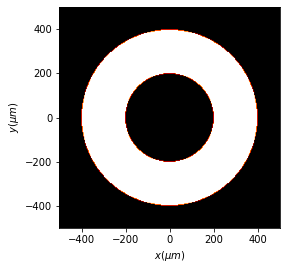

In [3]:
u0 = Scalar_mask_XY(x0, y0, wavelength)
u0.ring(r0=(0, 0), radius1=200 * um, radius2=400 * um, angle=0 * degrees)
u0.draw()


This function, inside diffractio is:

def ring(self, r0, radius1, radius2, angle=0 * degrees):
       
       """ Ring.
        Parameters:
            r0 (float, float): center of ring
            radius1 (float, float) or (float): inner radius
            radius2 (float, float) or (float): outer radius
            angle (float): angle of rotation in radians
        """


        ring1 = Scalar_mask_XY(self.x, self.y, self.wavelength)
        ring2 = Scalar_mask_XY(self.x, self.y, self.wavelength)
        ring1.circle(r0, radius1, angle)
        ring2.circle(r0, radius2, angle)

        self.u = ring2.u - ring1.u

## Development Mode

In [4]:
def ring_new(self, r0, radius1, radius2, angle=0 * degrees):
    """ Ring.

    Parameters:
        r0 (float, float): center of ring
        radius1 (float, float) or (float): inner radius
        radius2 (float, float) or (float): outer radius
        angle (float): angle of rotation in radians
    """

    ring1 = Scalar_mask_XY(self.x, self.y, self.wavelength)
    ring2 = Scalar_mask_XY(self.x, self.y, self.wavelength)
    ring1.circle(r0, radius1, angle)
    ring2.circle(r0, radius2, angle)

    self.u = ring2.u - ring1.u
    print("I am in the new function")
    return self


I am in the new function


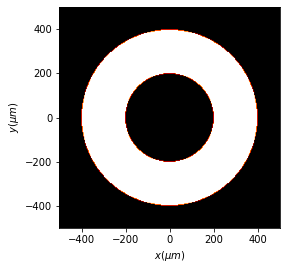

In [5]:
# Now it works as if it were inside Scalar_mask_XY

u1 = Scalar_mask_XY(x0, y0, wavelength)
u1 = ring_new(u1,
              r0=(0, 0),
              radius1=200 * um,
              radius2=400 * um,
              angle=0 * degrees)
u1.draw()
